# Prediction of Solar power

Data provided open source at:
https://www.kaggle.com/datasets/dilipkola/shell-ai-solar-irradiance-prediction-hackathon?group=bookmarked

##### Goals of analysis:
* Predict Global Irradiance for next 2 hours at 10 minute intervals given at least 2 hours of weather data

##### Data:
* Data is given every minute meaning at least 120 observations (2hours) must be used to output 12 data points (10 minute increments)

### Housekeeping

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as dt
import os
import sys
from Settings import columns, experiments
import Pipeline
# from sklearn.model_selection import train_test_split
import random
import tensorflow as tf
import timeit

In [2]:
os.getcwd() in sys.path

True

In [3]:
train = pd.read_csv('./archive/train.csv')
test = pd.read_csv('./archive/test.csv')

### Data Exploration
##### Thoughts while data cleaning
* Wet bulb is measure of heat stress in direct sunlight -- mixture of temp, humidity, wind speed, sun angle, and cloud cover
    * (Would be interesting to look at the change in dWB/dt)
* Would be interesting to take out yearly cycle, not sure if I have enough data. 

In [4]:
pipeline = Pipeline.DataClean(columns, experiments['all'])
pipeline.clean_data()
pipeline.norm()
pipeline.split_label()
pipeline.train_val()

i made it to train val
imade it to else statement


<AxesSubplot:>

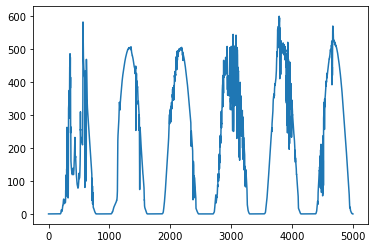

In [5]:
pipeline.label[0:5000].plot()

I need the label to be the mean values every 10 minutes over 2 hours of data, that means I need to get 120 values, chop it into 12 increments, and take the mean of the 10 values

Right now I am splitting my train and validation dataset through a random sampler. I will just grab data in 120 chunks and move on to try to get the model working.

In [ ]:


model = tf.keras.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
             loss=tf.keras.losses.MeanSquaredError(),
             metrics=['accuracy'])

together = tf.data.Dataset.from_tensor_slices([data,label])
together = together.batch(10).repeat()
inputs = Input(shape=(14,))
type(together)

# for count_batch in together.repeat().batch(1).take(1):
#   print(count_batch)


model.fit(together.mae_one_shot_iterator(), epochs=2)

#### For tomorrow:
* try yeild function in notebook to determine how long it runs to see if it is more efficient

In [ ]:
pipeline.data.sample(n=120, replace=False, random_state=26)

In [ ]:
# sns.heatmap(train.corr())

In [ ]:
pipeline.data.columns.shape

In [ ]:
pipeline.data

In [ ]:
np.shape(train_test_split(pipeline.data, test_size=0.3, train_size=0.7))

In [ ]:
train_test_split([1,2,3,3,4,5,6,7,5,6,4], test_size=0.3, train_size=0.7)

I need to split train/val by grabbing chunks of 120 samples in a row

In [ ]:
len(pipeline.data)

In [ ]:
startidx = []
samples = []
numsamples = 120
for i in range(60):
    startidx.append(random.choice(pipeline.data.index[:-numsamples]))
    samples.append(pipeline.data[startidx[i]:startidx[i]+numsamples])

In [ ]:
np.asarray(samples).shape

In [ ]:
60*0.7

In [ ]:
np.shape(samples[:42])

In [ ]:
np.shape(samples[42:])

In [ ]:
42+18